In [1]:
import pandas as pd
ms = pd.read_csv('../../sample_train.csv',low_memory=False)
numericos = ['AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges']
categoricos = [i for i in ms.columns if i not in numericos]

### Análise dos dados

Para a análise dos dados seguimos a estratégia explicada no relatório, sendo que neste ficheiro vamos mostrar um pouco como a mesma foi realizada. De referir apenas que como existiam 83 colunas (sendo uma o identificador da máquina que não varia e uma a variável resposta) decidimos dividir 27 colunas para cada elemento do grupo analisar.

Verificamos a percentagem de NAs presentes em cada coluna.
Podemos ver que algumas colunas contêm bastantes valores de NA e como foi referido foram eliminadas.

In [2]:
ms[categoricos].isna().sum()[ms[categoricos].isna().sum() != 0].sort_values(ascending=False) / ms.shape[0] * 100

PuaMode                                    99.977167
Census_ProcessorClass                      99.586833
DefaultBrowsersIdentifier                  95.149000
Census_IsFlightingInternal                 83.058333
Census_InternalBatteryType                 71.052833
Census_ThresholdOptIn                      63.539500
Census_IsWIMBootEnabled                    63.452667
SmartScreen                                35.611333
OrganizationIdentifier                     30.845500
SMode                                       6.015500
CityIdentifier                              3.611333
Wdft_IsGamer                                3.415333
Wdft_RegionIdentifier                       3.415333
Census_FirmwareManufacturerIdentifier       2.109833
Census_FirmwareVersionIdentifier            1.835333
Census_IsFlightsDisabled                    1.829833
Census_OEMModelIdentifier                   1.147833
Census_OEMNameIdentifier                    1.067667
Firewall                                    1.

Verificamos também o número de diferentes valores presentes em cada coluna.
As que contêm um número elevado foram eliminadas.

(Apenas apresentamos as maiores do que 10 senão ficaria muito extenso)

In [3]:
ms[categoricos].nunique()[ms[categoricos].nunique() > 10].sort_values(ascending=False)

MachineIdentifier                        600000
Census_OEMModelIdentifier                 45094
CityIdentifier                            40323
Census_FirmwareVersionIdentifier          25074
AvSigVersion                               6713
AVProductStatesIdentifier                  6100
Census_ProcessorModelIdentifier            2331
Census_OEMNameIdentifier                   1664
DefaultBrowsersIdentifier                   610
OsBuildLab                                  472
Census_FirmwareManufacturerIdentifier       314
Census_OSVersion                            305
GeoNameIdentifier                           266
LocaleEnglishNameIdentifier                 241
Census_OSBuildRevision                      239
CountryIdentifier                           222
IeVerIdentifier                             189
AppVersion                                   97
Census_OSUILocaleIdentifier                  94
Census_OSBuildNumber                         64
EngineVersion                           

Verificamos também as variáveis que apenas continham 1 valor distinto (constantes), pois não acrescentam informação nenhuma aos dados.

In [4]:
ms.nunique()[ms.nunique() == 1]

PuaMode                       1
Census_IsFlightingInternal    1
Census_IsWIMBootEnabled       1
dtype: int64

Fizemos uma análise semelhante à seguinte a cada variável verificando os seus diferentes valores. Esta análise teve um objetivo principail: verificar se os dados eram agrupáveis. 

Apresentamos apenas um exemplor porque apresentar todos seria demasiado extenso. Neste caso podemos verificar que existem dados que podem ser agrupados, nomeadamente os seguintes:
- Off, off e OFF podem ser agrupados apenas em Off
- On e on podem ser agrupados em On
- os valores com carateres anormais podem ser agrupados em other

In [5]:
ms['SmartScreen'].value_counts()

RequireAdmin    290138
ExistsNotSet     70339
Off              12629
Warn              9080
Prompt            2425
Block             1493
off                106
On                  59
&#x02;              24
&#x01;              23
on                  14
0                    1
OFF                  1
Name: SmartScreen, dtype: int64

Verifica as diferenças entre os 2 valores possíveis da variável resposta.

Concluímos que é balanceado (importante porque assim o modelo não cai num caso de prever apenas 1 classe pela outra ser rara).

In [6]:
print(ms[ms['HasDetections']  == 0].shape)
ms[ms['HasDetections']  == 1].shape

(299923, 83)


(300077, 83)

Verificamos também as correlações entre as variáveis quantitativas. No entanto pelo facto de estas serem poucas e apenas parecer haver evidencia de uma correlação alta decidimos não efetuar qualquer procedimento que diz respeito a este caso.

Possivelmente era algo que devíamos ter olhado com mais cuidado.

0.9012683591985728


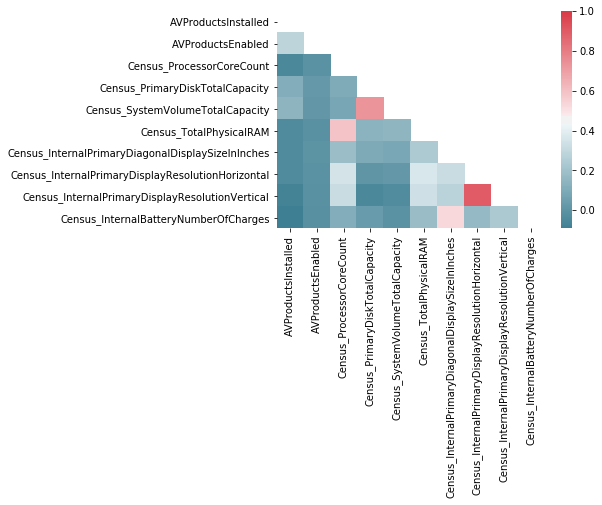

In [8]:
msN = ms[numericos]
print(msN.corr()['Census_InternalPrimaryDisplayResolutionHorizontal']['Census_InternalPrimaryDisplayResolutionVertical'])
import seaborn as sns
import numpy as np
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(msN.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(msN.corr(), cmap=cmap, mask=mask)